In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font='IPAGothic')
import numpy as np
import statsmodels.api as sm

In [2]:
import numpy as np
import pandas as pd
data = pd.read_excel("Calls.xlsx")
print("length of data",len(data))
print(data.head(5))

length of data 33
       Date  Calls
0  2017-1-1  18600
1  2017-2-1  21150
2  2017-3-1  29675
3  2017-4-1  22675
4  2017-5-1  22900


In [3]:
data['Date'] =pd.to_datetime(data['Date'])
data.index= data['Date']


findfont: Font family ['IPAGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['IPAGothic'] not found. Falling back to DejaVu Sans.


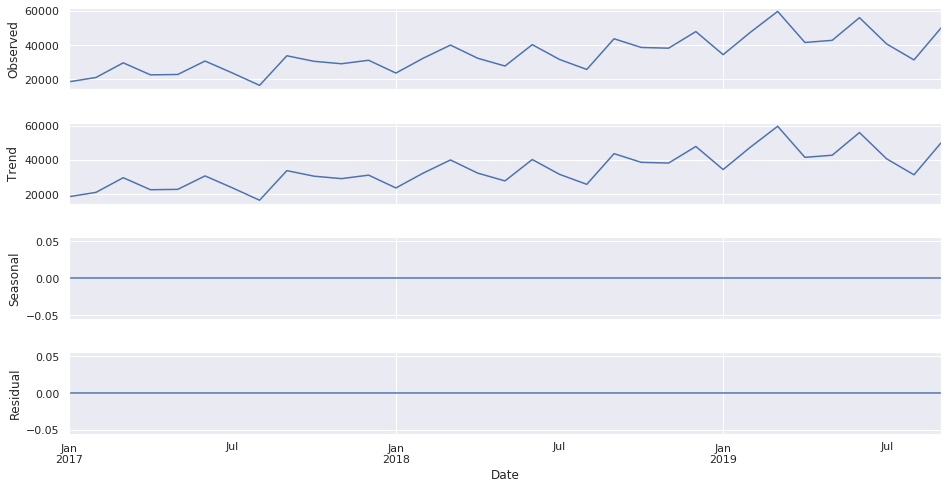

In [4]:
res = sm.tsa.seasonal_decompose(data.Calls.dropna(),freq=1)
fig = res.plot()
fig.set_figheight(8)
fig.set_figwidth(15)
plt.show()

In [5]:
tr_start,tr_end = '2017-01-01','2018-11-01'
te_start,te_end = '2018-12-01','2019-09-01'
tra = data["Calls"][tr_start:tr_end]
tes = data["Calls"][te_start:te_end]

In [6]:
#ADF-test(Original-time-series)
res = sm.tsa.adfuller(data['Calls']['2017-01-01':].dropna(),regression='ct')
print('p-value:{}'.format(res[1]))

p-value:0.00416669922543561


In [7]:
res = sm.tsa.adfuller(data['Calls']['2017-01-01':].diff().dropna(),regression='c')
print('p-value:{}'.format(res[1]))

p-value:9.972844564454698e-07


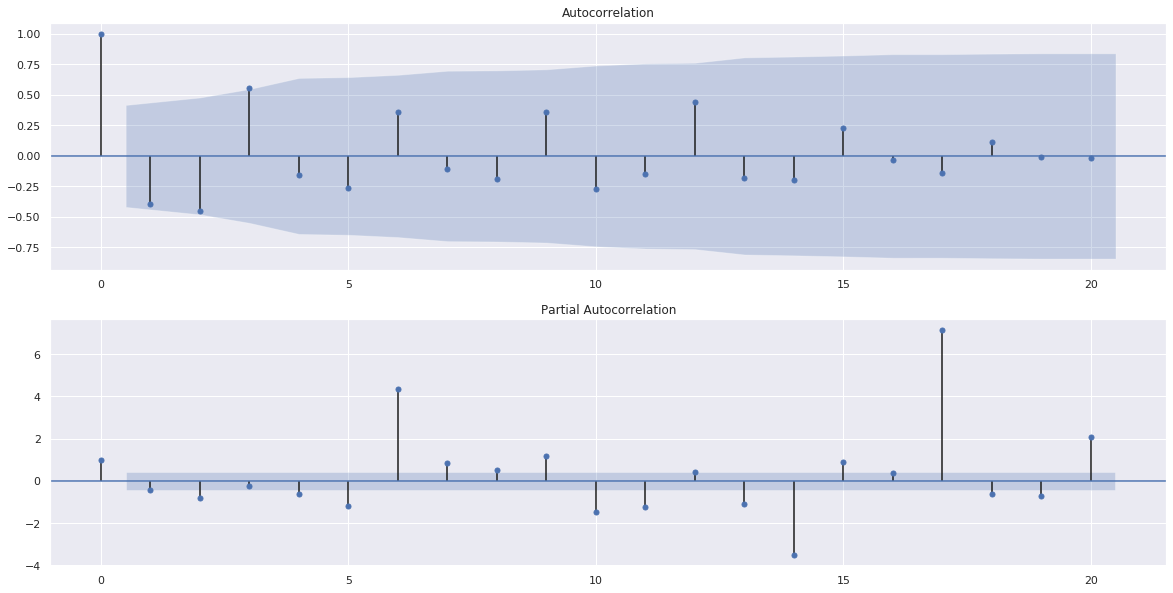

In [8]:
#we use tra.diff()(differenced data), because this time series is unit root process.
fig,ax = plt.subplots(2,1,figsize=(20,10))
fig = sm.graphics.tsa.plot_acf(tra.diff().dropna(), lags=20, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(tra.diff().dropna(), lags=20, ax=ax[1])
plt.show()

In [9]:
arima = sm.tsa.statespace.SARIMAX(tra,order=(2,0,0),seasonal_order=(0,0,0,0),enforce_stationarity=False, enforce_invertibility=False,).fit()
arima.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                  Calls   No. Observations:                   23
Model:               SARIMAX(2, 0, 0)   Log Likelihood                -217.785
Date:                Thu, 12 Dec 2019   AIC                            441.571
Time:                        17:16:37   BIC                            444.704
Sample:                    01-01-2017   HQIC                           442.251
                         - 11-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6207      0.286      2.172      0.030       0.061       1.181
ar.L2          0.3939      0.260      1.517      0.129      -0.115       0.903
sigma2      5.962e+07   3.51e-10    1.7e+17      0.000    5.96e+07    5.96e+07
===================================================================================
Ljung-Box (Q):                         nan   Jarque-Bera (JB):                 1.59
Prob(Q):                               nan   Prob(JB):                         0.45
Heteroskedasticity (H):               1.06   Skew:                             0.40
Prob(H) (two-sided):                  0.94   Kurtosis:                         1.92
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.08e+34. Standard errors may be unstable.
"""

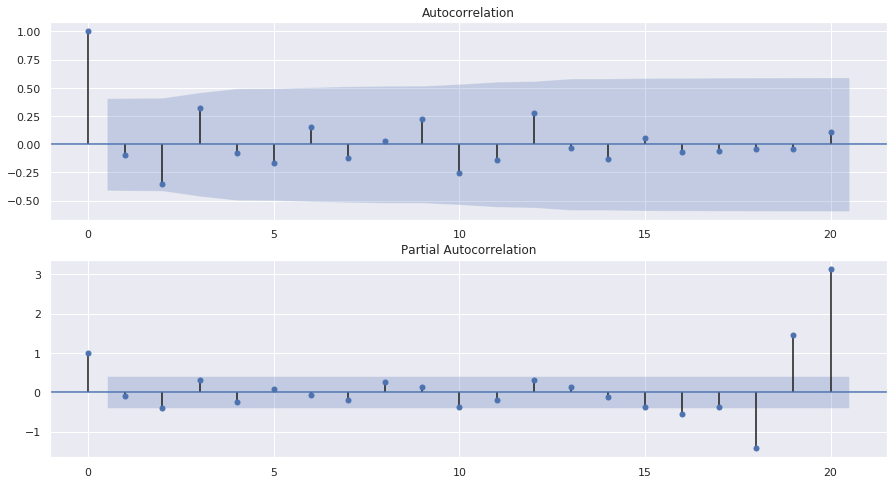

In [10]:
res = arima.resid
fig,ax = plt.subplots(2,1,figsize=(15,8))
fig = sm.graphics.tsa.plot_acf(res, lags=20, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(res, lags=20, ax=ax[1])
plt.show()

In [11]:
from sklearn.metrics import mean_squared_error
from math import sqrt
pred = arima.predict(tr_end,te_end)[1:]
print('ARIMA model MSE:{}'.format(sqrt(mean_squared_error(tes,pred))))

ARIMA model MSE:9684.304857761277


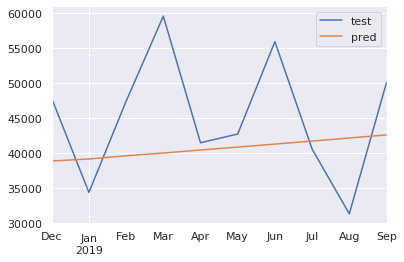

In [12]:
pd.DataFrame({'test':tes,'pred':pred}).plot();plt.show()

In [104]:
sarima = sm.tsa.statespace.SARIMAX(tra,order=(15,0,1),seasonal_order=(15,0,1,1),enforce_stationarity=False, enforce_invertibility=False).fit()
sarima.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                  Statespace Model Results                                 
===========================================================================================
Dep. Variable:                               Calls   No. Observations:                   23
Model:             SARIMAX(15, 0, 1)x(15, 0, 1, 1)   Log Likelihood                   0.000
Date:                             Thu, 12 Dec 2019   AIC                             66.000
Time:                                     18:04:05   BIC                                nan
Sample:                                 01-01-2017   HQIC                               nan
                                      - 11-01-2018                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0074         -0        inf      0.000      -0.007      -0.007
ar.L2         -0.0502         -0        inf      0.000      -0.050      -0.050
ar.L3         -0.0024         -0        inf      0.000      -0.002      -0.002
ar.L4         -0.0811         -0        inf      0.000      -0.081      -0.081
ar.L5          0.0536         -0       -inf      0.000       0.054       0.054
ar.L6          0.1925         -0       -inf      0.000       0.193       0.193
ar.L7          0.3225         -0       -inf      0.000       0.322       0.322
ar.L8         -0.0665         -0        inf      0.000      -0.066      -0.066
ar.L9          0.4008         -0       -inf      0.000       0.401       0.401
ar.L10        -0.1408         -0        inf      0.000      -0.141      -0.141
ar.L11         0.0202         -0       -inf      0.000       0.020       0.020
ar.L12         0.6933         -0       -inf      0.000       0.693       0.693
ar.L13        -0.0077         -0        inf      0.000      -0.008      -0.008
ar.L14        -0.0412         -0        inf      0.000      -0.041      -0.041
ar.L15        -0.0511         -0        inf      0.000      -0.051      -0.051
ma.L1          0.0247         -0       -inf      0.000       0.025       0.025
ar.S.L1       -0.0074         -0        inf      0.000      -0.007      -0.007
ar.S.L2       -0.0502         -0        inf      0.000      -0.050      -0.050
ar.S.L3       -0.0024         -0        inf      0.000      -0.002      -0.002
ar.S.L4       -0.0811         -0        inf      0.000      -0.081      -0.081
ar.S.L5        0.0536         -0       -inf      0.000       0.054       0.054
ar.S.L6        0.1925         -0       -inf      0.000       0.193       0.193
ar.S.L7        0.3225         -0       -inf      0.000       0.322       0.322
ar.S.L8       -0.0665         -0        inf      0.000      -0.066      -0.066
ar.S.L9        0.4008         -0       -inf      0.000       0.401       0.401
ar.S.L10      -0.1408         -0        inf      0.000      -0.141      -0.141
ar.S.L11       0.0202         -0       -inf      0.000       0.020       0.020
ar.S.L12       0.6933         -0       -inf      0.000       0.693       0.693
ar.S.L13      -0.0077         -0        inf      0.000      -0.008      -0.008
ar.S.L14      -0.0412         -0        inf      0.000      -0.041      -0.041
ar.S.L15      -0.0511         -0        inf      0.000      -0.051      -0.051
ma.S.L1        0.0247         -0       -inf      0.000       0.025       0.025
sigma2          1e-10         -0       -inf      0.000       1e-10       1e-10
===================================================================================
Ljung-Box (Q):                         nan   Jarque-Bera (JB):                  nan
Prob(Q):                               nan   Prob(JB):                          nan
Heteroskedasticity (H):     

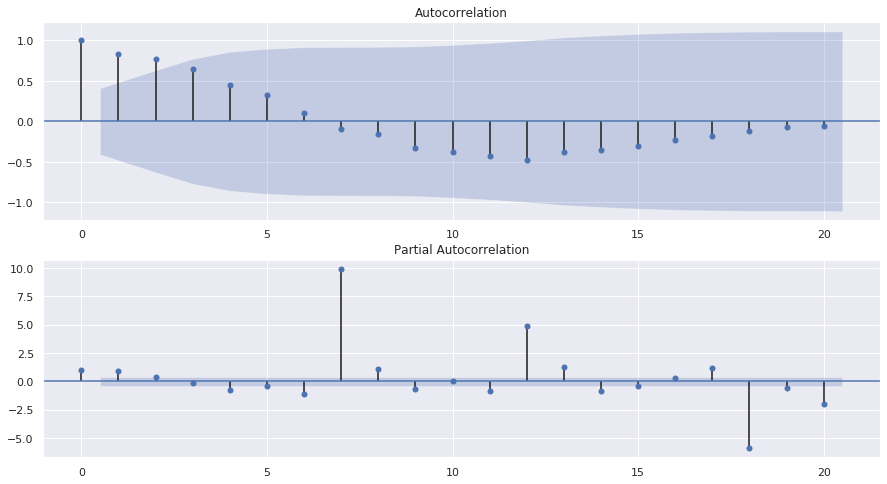

In [105]:
res = sarima.resid
fig,ax = plt.subplots(2,1,figsize=(15,8))
fig = sm.graphics.tsa.plot_acf(res, lags=20, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(res, lags=20, ax=ax[1])
plt.show()

In [106]:
from sklearn.metrics import mean_squared_error
from math import sqrt
pred = sarima.predict(tr_end,te_end)[1:]
print('SARIMA model MSE:{}'.format(sqrt(mean_squared_error(tes,pred))))

SARIMA model MSE:6254.181980549711


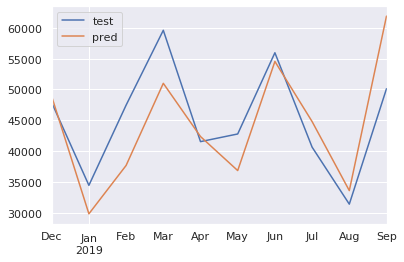

In [107]:
pd.DataFrame({'test':tes,'pred':pred}).plot();plt.show()

In [99]:
#15,0,1(6254.181980549711)